In [46]:
#Libraries required for analysis and visualisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [47]:
pd.core.common.is_list_like = pd.api.types.is_list_like #this is to avoid an error on datareader
import pandas_datareader as pdr

In [48]:
from datetime import datetime

In [49]:
from __future__ import division

In [50]:
#import quandl
#quandl.ApiConfig.api_key ='ySnKkyBERtsqJy3F4kgM'

In [51]:
list_comp = ['RELIANCE.IN','BPCL.IN','PVR.IN','IOC.IN']

In [52]:
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)

In [53]:
y = []
for stock in list_comp:
    x = pdr.data.DataReader(stock,'quandl',start,end)
    y.append(x)

In [54]:
ril = pd.DataFrame(y[0])
bpcl = pd.DataFrame(y[1])
pvr = pd.DataFrame(y[2])
iocl = pd.DataFrame(y[3])

In [55]:
ril.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2018-07-06 to 2017-07-07
Data columns (total 7 columns):
Open                  250 non-null float64
High                  250 non-null float64
Low                   250 non-null float64
Last                  250 non-null float64
Close                 250 non-null float64
TotalTradeQuantity    250 non-null float64
TurnoverLacs          250 non-null float64
dtypes: float64(7)
memory usage: 15.6 KB


In [56]:
pvr.head()

,Open,High,Low,Last,Close,TotalTradeQuantity,TurnoverLacs
Date,,,,,,,
2018-07-06,1371.5,1387.65,1365.00,1372.85,1371.50,118375.0,1625.05
2018-07-05,1379.0,1387.25,1368.00,1375.00,1376.65,131782.0,1814.05
2018-07-04,1371.9,1398.95,1370.15,1376.15,1378.35,108849.0,1504.88
2018-07-03,1362.0,1394.90,1352.35,1379.00,1376.40,159516.0,2191.59
2018-07-02,1378.0,1382.85,1352.10,1361.00,1366.20,228003.0,3125.82


In [57]:
iocl.tail()

,Open,High,Low,Last,Close,TotalTradeQuantity,TurnoverLacs
Date,,,,,,,
2017-07-13,393.9,396.00,377.60,382.05,380.95,7539938.0,28884.93
2017-07-12,390.0,398.60,390.00,392.05,392.60,4215427.0,16638.22
2017-07-11,386.4,388.75,380.60,387.10,387.50,3454486.0,13342.45
2017-07-10,387.0,390.15,380.00,383.80,383.45,410854.0,1580.19
2017-07-07,382.0,383.35,377.15,382.50,382.25,1964013.0,7482.86


In [58]:
ril = ril.reindex(ril.index[::-1])
iocl = iocl.reindex(iocl.index[::-1])
bpcl = bpcl.reindex(bpcl.index[::-1])
pvr = pvr.reindex(pvr.index[::-1])

In [59]:
bpcl.head()

,Open,High,Low,Last,Close,TotalTradeQuantity,TurnoverLacs
Date,,,,,,,
2017-07-07,661.0,669.75,659.10,664.05,663.95,3653118.0,24293.90
2017-07-10,645.2,691.20,645.20,663.70,664.65,489540.0,3266.48
2017-07-11,668.9,680.80,664.25,679.95,678.30,3743038.0,25237.13
2017-07-12,684.0,687.00,678.25,684.00,683.70,3134866.0,21415.87
2017-07-13,458.0,465.75,454.40,458.30,458.55,3875953.0,17801.25


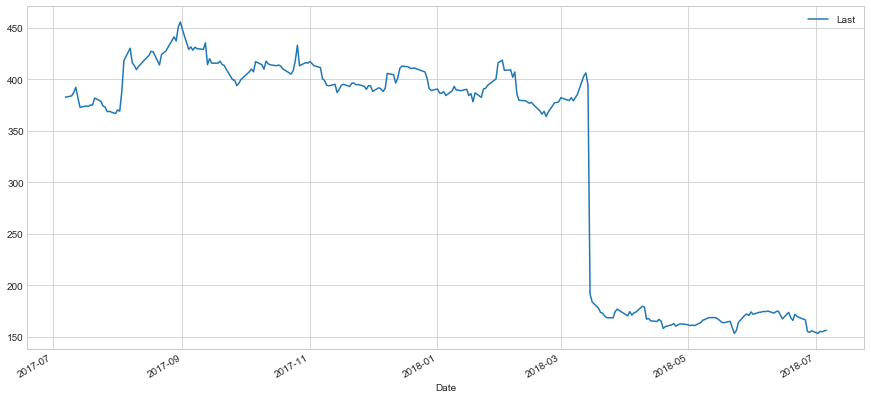

In [60]:
iocl['Last'].plot(legend = True,figsize = (15,7))

In [61]:
#A moving average (MA) is a widely used indicator in technical analysis that helps smooth out price action by filtering out the “noise” from random price fluctuations. It is a trend-following, or lagging, indicator because it is based on past prices.

In [62]:
ma_day = [10,50,200]
for days in ma_day:
     col_name = 'MA for %s days'%(str(days))
     ril[col_name] = ril['Close'].rolling(window = days).mean()
     bpcl[col_name] = bpcl['Close'].rolling(window = days).mean()
     iocl[col_name] = iocl['Close'].rolling(window = days).mean()
     pvr[col_name] = pvr['Close'].rolling(window = days).mean()

In [63]:
iocl.tail()

,Open,High,Low,Last,Close,TotalTradeQuantity,TurnoverLacs,MA for 10 days,MA for 50 days,MA for 200 days
Date,,,,,,,,,,
2018-07-02,156.20,157.75,152.20,153.35,153.70,8556183.0,13177.85,162.810,166.318,311.69750
2018-07-03,153.70,155.80,153.00,155.30,155.30,8148192.0,12610.58,161.480,166.190,310.39425
2018-07-04,154.95,156.35,154.10,155.10,155.25,5945840.0,9223.16,160.465,166.034,309.07200
2018-07-05,153.65,157.30,153.65,155.75,155.00,8994632.0,14002.90,158.940,165.922,307.76875
2018-07-06,156.20,159.90,155.95,156.50,156.70,9866027.0,15578.68,157.610,165.833,306.47400


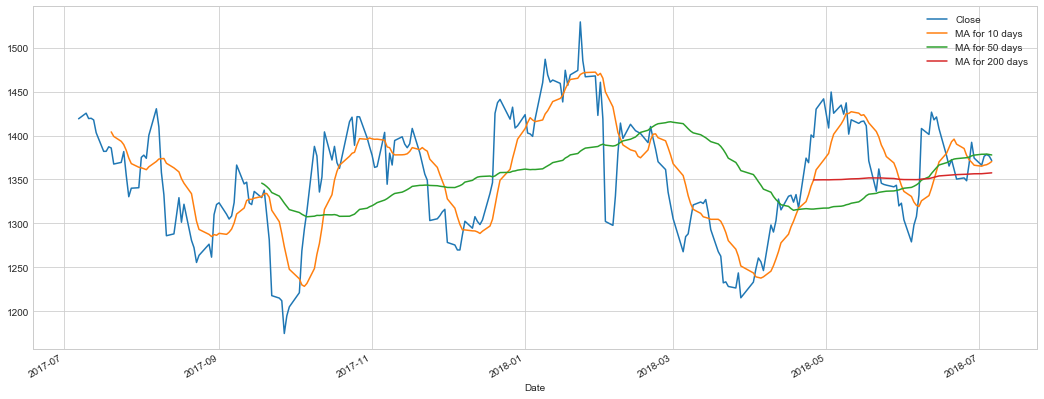

In [64]:
pvr[['Close','MA for 10 days','MA for 50 days','MA for 200 days']].plot(subplots = False,figsize = (18,7))

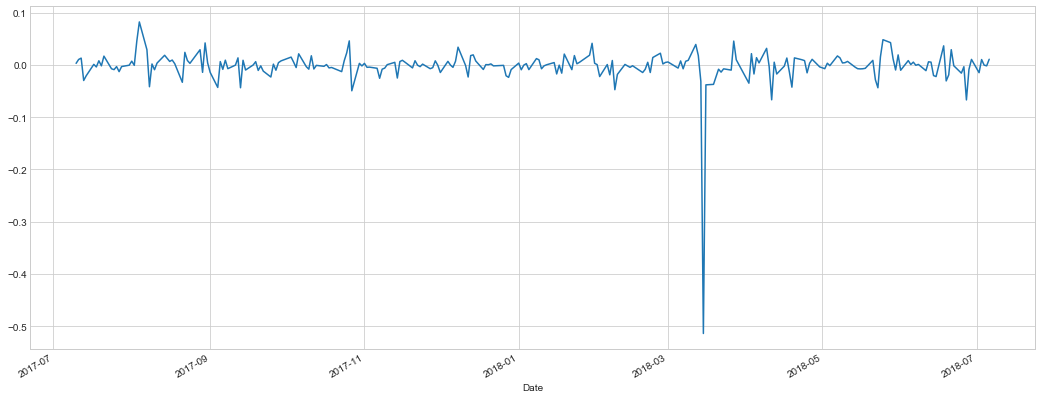

In [65]:
iocl['Daily_Return'] = iocl['Close'].pct_change()
iocl['Daily_Return'].plot(figsize = (18,7))

In [66]:
sns.distplot(ril['Daily_Return'].dropna(),bins = 100 , color = 'red')

KeyError: 'Daily_Return'

In [ ]:
ril['Daily_Return'].hist(bins = 100)

In [ ]:
df_cl = pd.DataFrame()

In [ ]:
df_cl['ril'] = ril['Close']
df_cl['bpcl'] = bpcl['Close']
df_cl['pvr'] = pvr['Close']
df_cl['iocl'] = iocl['Close']
df_cl.index = ril.index

In [ ]:
df_cl.head()

In [ ]:
pct_chng = df_cl.pct_change()

In [ ]:
pct_chng.head()

In [ ]:
sns.jointplot('bpcl','iocl',pct_chng)

In [ ]:
sns.pairplot(pct_chng.dropna())

In [ ]:
graph = sns.PairGrid(pct_chng.dropna())
graph.map_upper(plt.scatter,color = 'red')
graph.map_lower(sns.kdeplot)
graph.map_diag(plt.hist,bins = 100)

In [ ]:
graph = sns.PairGrid(df_cl.dropna())
graph.map_upper(plt.scatter,color = 'red')
graph.map_lower(sns.kdeplot)
graph.map_diag(plt.hist,bins = 100)

In [ ]:
# Compute the correlation matrix
corr = pct_chng.corr()
print(corr)

In [ ]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

In [ ]:
sns.heatmap(corr, mask=mask, cmap=sns.diverging_palette(256,0,sep = 80,n=7,as_cmap = True))

In [ ]:
rets = pct_chng.dropna()
#scatterplot
area = np.pi*20
plt.scatter(rets.mean(),rets.std(),s = area)
plt.xlabel('Expected_Risk')
plt.ylabel('Risk')

#Annotate axis in matplotlib

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

In [ ]:
sns.distplot(ril['Daily_Return'].dropna(),bins =100,color = 'indianred')

In [ ]:
rets['bpcl'].quantile(0.05)

In [ ]:
days = 365
dt = 1/days
mu = rets['ril'].mean()
sigma = rets['ril'].std()


In [ ]:
def monte_carlo(start_price,days,mu,sigma):
    price = np.zeros(days)
    price[0]=start_price
    shock = np.zeros(days)
    drift = np.zeros(days)
    for x in range(1,days):
        shock[x] = np.random.normal(loc = mu*dt,scale = sigma*np.sqrt(dt))
        drift[x] = mu*dt
        price[x] = price[x-1] + (price[x-1]*(drift[x]+shock[x]))
        
    return price                        

In [ ]:
ril.head()

In [ ]:
start_price = 1345.10
for run in range(100):
    plt.plot(monte_carlo(start_price,days,mu,sigma))
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Reliance')

In [ ]:
runs = 10000

simulations = np.zeros(runs)

np.set_printoptions(threshold=5)

for run in range(runs):    
    simulations[run] = monte_carlo(start_price,days,mu,sigma)[days-1]

In [ ]:
q = np.percentile(simulations,1)
plt.hist(simulations,bins = 200)
plt.figtext(0.6, 0.8, s="Start price: INR%.2f" %start_price)
plt.figtext(0.6, 0.7, "Mean final price: INR%.2f" % simulations.mean())
plt.figtext(0.6, 0.6, "VaR(0.99): INR%.2f" % (start_price - q,))
plt.figtext(0.15, 0.6, "q(0.99): INR%.2f" % q)
plt.axvline(x=q, linewidth=4, color='r')
plt.title(u"Final price distribution for Reliance Stock after %s days" % days, weight='bold');